# Notebook 05: Apply Models

# Introduction

In this notebook, the LogisticRegression model 1 and SVC model are applied to the other 17 datasets and prediction accuracy is tracked over time. The performance of both models are tracked over time, revealing a linear relationship, with the SVC model performing a few % better. Factors that might influence accuracy are further examined, such as percentage of common words of the top 100 words from both subreddits, evolution of top 15 words over time, and sentiment distribution between posts.

Model performance is also evaluated for posts from other subredits, to clarify the factors that might differentiate posts into individual subreddits.

A summary of observations is listed at the end of this notebook.

Contents:

1. Prediction accuracies over time
2. Accuracy correlation between models
3. Common word count relationship with accuracy
4. Evolution of top 15 words over time
5. Examine misclassified posts
6. Sentiment comparison between misclassified and correctly classified posts
7. Classification accuracy with other subreddits
8. Summary

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pickle
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# this setting widens how many characters pandas will display in a column:
pd.options.display.max_colwidth = 350

Import the pickled pipelines.

In [2]:
with open('../models/subreddit_model1.pkl', mode='rb') as pickle_in: # reading bytes
    pipe1 = pickle.load(pickle_in) # we are deserializing the bytes we previously wrote to disk

with open('../models/subreddit_model_svc.pkl', mode='rb') as pickle_in: # reading bytes
    pipe2 = pickle.load(pickle_in) # we are deserializing the bytes we previously wrote to disk

## 1. Calculate prediction accuracies over time

In [3]:
# function to calculate model accuracy over time

def apply_model(num):

    # generate file name
    fileLPT = f'../data/raw/LifeProTips_{i}.csv'
    fileST = f'../data/raw/Showerthoughts_{i}.csv'

    # open csv files
    LPT = pd.read_csv(fileLPT)
    ST = pd.read_csv(fileST)

    # create dataframe
    df = pd.concat([LPT, ST])

    # drop duplicates
    df.drop_duplicates(inplace=True)

    # reset index
    df.reset_index(inplace=True)

    # binarize 'subreddit'
    df['subreddit'] = df['subreddit'].map({'LifeProTips':1, 'Showerthoughts':0})

    # define X, y
    X = df['title']
    y = df['subreddit']

    # accuracy
    score1 = pipe1.score(X,y)
    score2 = pipe2.score(X,y)

    # add predictions to df 
    df['preds1'] = pipe1.predict(X)
    df['preds2'] = pipe2.predict(X)
    
    return score1, score2, df
    

In [4]:
# store accuracies and create 17 df's with predictions

accuracy1 = []
accuracy2 = []

numsets = 17

for i in range(numsets):
    output = apply_model(i)
    accuracy1.append(output[0])
    accuracy2.append(output[1])
    filename = f"df{i}"
    vars()[filename] = output[2]

In [5]:
# confirm df has predictions from both models
df2.head(20)

,index,subreddit,selftext,title,preds1,preds2
0,0,1,"""I'm a great driver, I've never been in a wreck"" says the person texting while driving down the highway at 70 mph.","LPT: ""I've never been in a wreck"" doesn't magically protect you from other people's bad driving",0,0
1,1,1,NaN,LPT: Don't want watermarks on your memes? Add another image below your meme so the watermark appears on it and crop it out,1,1
2,2,1,NaN,LPT: Can’t think of a good gift idea for a loved one? Write them a thoughtful letter!,1,1
3,3,1,NaN,"LPT: If you use a digital boarding pass, set it as your lockscreen so you don't have to keep your phone open.",1,1
4,4,1,NaN,"LPT: if you're running an illegal scheme and haven't been caught, perhaps today is a good day to count your blessings and call it quits.",1,1
5,5,1,[removed],"LPT: at least 45% of the US population is deficient in the electrolyte magnesium. Hypomagnesia can cause fatigue, sleep problems, headaches and other feelings of general malaise. Popular electrolyte drinks like Gatorade and Pedialyte contain no magnesium so it's best to get it from dietary sources.",0,0
6,6,1,NaN,"LPT: Anytime you order food from a fast food place, right after they tell you your total, ask for a large water, 99% of the time they give you a large for free rather than ringing you up again. I've used at quite a few different fast food chains",1,1
7,7,1,NaN,"LPT: Can't sleep? Find the one thing falls you asleep and do it. For example, I'm a college student and I fall asleep when I try to watch calculus videos. Mostly educational videos will work for you.",1,1
8,8,1,"Type u/vredditdownloader in the comment section of the video, the bot will reply instantly with a downloadable link.\n\n\nDisclaimer- I'm nothing to do with this bot or want any credit for it, I just thought it was helpful and cool to know.","LPT: If you are browsing Reddit and see a video clip you would like to show friends/family who aren't on here, use the redditdownloader to save it to your phone and send it via your preferred app to said person. Instructions in text post.",1,1
9,9,1,"Every piece of paper should be shredded. Doctors letters, bills, even notes you've written. And single cut shredders produce lines of shredded paper, which can now be restitched electronically with specialised apps. You need the diamond or double cut shredders that cross shred and leave behind unusable scraps.",LPT: Invest in a good diamond/double cut shredder and shred anything with your name or address on it. Most trash ends in landfills where ID thieves can find neatly sealed trash bags with all kinds of letters and personal details.,1,1


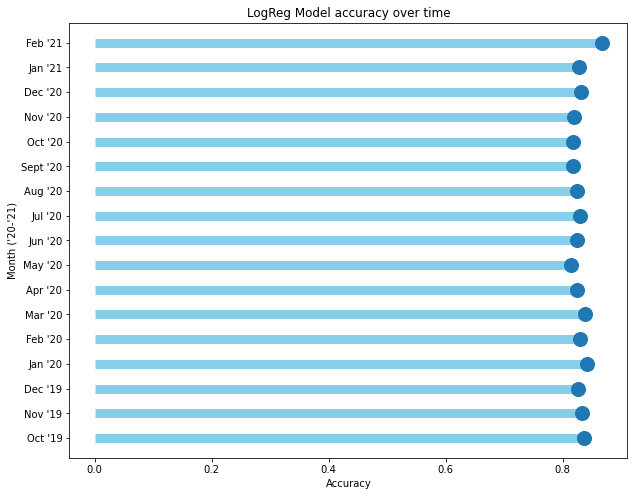

In [6]:
months = ["Oct '19", "Nov '19", "Dec '19",
         "Jan '20", "Feb '20", "Mar '20", "Apr '20", "May '20",
         "Jun '20", "Jul '20", "Aug '20", "Sept '20", "Oct '20",
         "Nov '20", "Dec '20", "Jan '21", "Feb '21"]


# try lollipop plot
# https://python-graph-gallery.com/182-vertical-lollipop-plot/

my_range=range(0,len(accuracy1))
plt.figure(figsize=(10,8))
plt.hlines(y=months, xmin=0, xmax=accuracy1, color='skyblue', linewidth=9)
plt.plot(accuracy1, my_range, "o", markersize=14)
 
# Add titles and axis names
# plt.yticks(my_range, ordered_df['group'])
plt.title("LogReg Model accuracy over time")
plt.xlabel('Accuracy')
plt.ylabel("Month ('20-'21)")
plt.show()

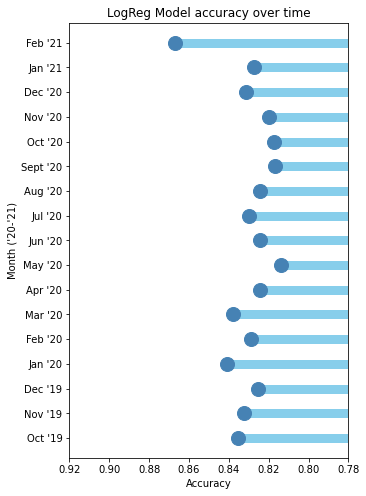

In [7]:
# LogReg
# ZOOM IN lollipop plot to see variation in accuracy over time
# https://python-graph-gallery.com/182-vertical-lollipop-plot/

my_range=range(0,len(accuracy1))
plt.figure(figsize=(5,8))
plt.hlines(y=months, xmin=0.78, xmax=accuracy1, color='skyblue', linewidth=9)
plt.plot(accuracy1, my_range, "o", markersize=14, color='steelblue')
 
# Add titles and axis names
plt.title("LogReg Model accuracy over time")
plt.xlabel('Accuracy')
plt.ylabel("Month ('20-'21)")
plt.xlim([0.92, 0.78])
plt.show()

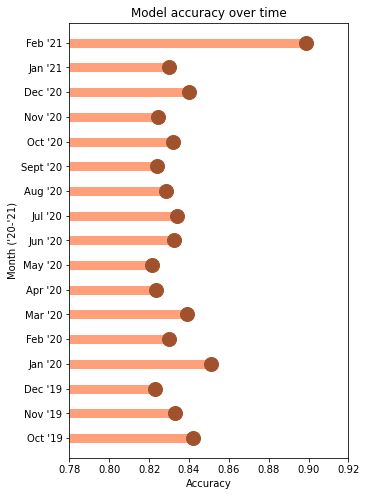

In [8]:
# SVC
# ZOOM IN lollipop plot
# https://python-graph-gallery.com/182-vertical-lollipop-plot/

my_range=range(0,len(accuracy1))
plt.figure(figsize=(5,8))
plt.hlines(y=months, xmin=0.78, xmax=accuracy2, color='lightsalmon', linewidth=9)
plt.plot(accuracy2, my_range, "o", markersize=14, color='sienna')
 
# Add titles and axis names
# plt.yticks(my_range, ordered_df['group'])
plt.title("Model accuracy over time")
plt.xlabel('Accuracy')
plt.ylabel("Month ('20-'21)")
plt.xlim([0.78, 0.92])
plt.show()

Ultimately, both these models are overfit. The training accuracy was 93% for LogReg and 99% for SVC, while these test accuracies are around 83%. The degree of overfitting looks the same (same amount of difference between training score and average testing score). It looks like the prediction accuracy might have some cylical pattern to it, going from high to low every few months. Accuracy is commonly highest overall in Feb 2021 and lowest in May 2020. Even though the accuracy distribution is not exactly the same, from both models, the trends are very very similar as shown by the LogisticRegression. It's not clear why there is such a large (8%) leap from Jan 2021 to Feb 2021. Let's plot one against the other.

## 2. Is There Correlation Between Model Accuracies?

In [9]:
accuracies = pd.DataFrame(index=[i for i in range(numsets)])
accuracies['accu1'] = accuracy1
accuracies['accu2'] = accuracy2
accuracies.head()

,accu1,accu2
0,0.835507,0.842026
1,0.832411,0.832914
2,0.825213,0.822702
3,0.840966,0.851032
4,0.828947,0.829960


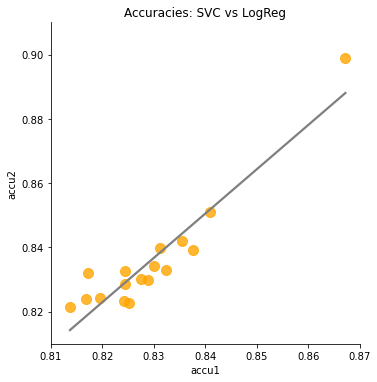

In [10]:
sns.lmplot(x='accu1', y='accu2', data=accuracies, palette='CMRmap_r', 
           ci=False, scatter_kws={"s": 100, 'color': 'orange'}, line_kws={'color':'gray'})
plt.xlim([0.81, 0.87])
plt.ylim([0.81, 0.91])
plt.title('Accuracies: SVC vs LogReg')
plt.show()

It looks like LogReg and SVC have the same performance for these datasets. This similarity between LogReg and SVC accuracies is amazing. When I had previously compared LogReg with ExtraTrees, the scores still have a linear relationship but there was more scatter in the relationship.

I wonder why May 2020 is min and Feb 2021 is max, and wonder how to investigate this further. Perhaps we'll look at the following:
* how does the common word count change over time?
* how does the top 10 words change over time?
* what do misclassified posts look like?

## 3. Does Common Word Count Correlate with Accuracy?

In [11]:
# Function to count common words between subreddits, in the top 100 words of each post.

# function flow
# for each dataframe (total = 17):
# put the LifeProTips and Showerthoughts posts in their own dataframes (df_subr)
# for each df_subr, tokenize, count, sort
# compare word counts
# store the percentage-word-overlap in a list
# store the top 10 words in a top_10_df

my_stopwords = list(CountVectorizer(stop_words = 'english').get_stop_words()) + ['lpt']

def word_count(num, df, stop_yes):
    
    X1 = df[df['subreddit']==1]['title'] # LifeProTips
    X0 = df[df['subreddit']==0]['title'] # Showerthoughts

    # Instantiate a CountVectorizer object, excluding 'english' and 'lpt' (exclude common words because boring)
    if stop_yes == 0:
        cvec1 = CountVectorizer(stop_words = ['lpt'])
        cvec0 = CountVectorizer(stop_words = ['lpt'])
    else:
        cvec1 = CountVectorizer(stop_words = my_stopwords)
        cvec0 = CountVectorizer(stop_words = my_stopwords)

    # Fit the count vectorizer on the titles
    cvec1.fit(X1)
    cvec0.fit(X0)
    
    # Transform the corpus. Count Vectorizer transformer results in a sparse matrix
    X1_cv = cvec1.transform(X1)
    X0_cv = cvec0.transform(X0)

    # Store the transformed data (LifeProTips)
    X1_df = pd.DataFrame(X1_cv.todense(), columns=cvec1.get_feature_names())
    # Store the transformed data (Showerthoughts)
    X0_df = pd.DataFrame(X0_cv.todense(), columns=cvec0.get_feature_names())
    
    common_sci = X1_df.sum().sort_values(ascending=False).head(100).index.tolist()
    common_spc = X0_df.sum().sort_values(ascending=False).head(100).index.tolist()
    
    # count common words
    results = 0

    for i in range(len(common_sci)):
        results += common_spc.count(common_sci[i])

    return results, common_sci, common_spc

In [12]:
# instantiate 'results' variable which counts number of common words
results = []
# instantiate 'top_words' df to log the top 100 words of each df
top_words_L = pd.DataFrame(index=[i for i in range(100)])
top_words_S = pd.DataFrame(index=[i for i in range(100)])

for i in range(numsets):
    filename = f"df{i}"
    output = word_count(i, vars()[filename], 1) # send 'i' and dataframe into the function
    results.append(output[0])
    top_words_L[f'Month {i}'] = output[1]
    top_words_S[f'Month {i}'] = output[2]
    
 # store common words in df
#     top_words_L[f'Month {num}'] = common_sci
#     top_words_S[f'Month {num}'] = common_spc

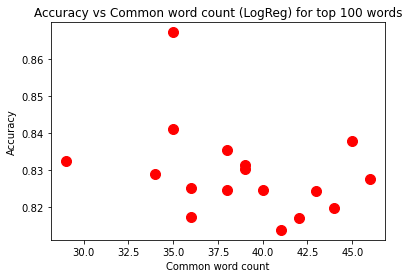

In [13]:
plt.plot(results,accuracy1,'o',ms=10,color='red')
plt.title('Accuracy vs Common word count (LogReg) for top 100 words')
plt.xlabel('Common word count')
plt.ylabel('Accuracy')
plt.show()

There is not an obvious relationship between model accuracy and common word count.

## 4. How Does Top 15 Words Change Over Time?

In [14]:
top_words_L.columns = months
top_words_L.head(15)

,Oct '19,Nov '19,Dec '19,Jan '20,Feb '20,Mar '20,Apr '20,May '20,Jun '20,Jul '20,Aug '20,Sept '20,Oct '20,Nov '20,Dec '20,Jan '21,Feb '21
0,don,d8,don,don,don,time,don,don,don,don,don,don,don,don,don,don,don
1,use,d9,make,use,use,don,use,just,like,use,use,want,make,make,time,use,water
2,want,don,just,want,just,use,time,make,use,want,want,like,time,use,want,make,use
3,make,just,want,make,want,home,want,use,make,time,time,use,want,time,make,time,make
4,time,want,use,like,time,paper,like,want,time,make,make,make,use,just,just,just,just
5,phone,use,time,just,people,toilet,make,time,just,phone,like,need,just,people,use,people,want
6,just,phone,know,phone,phone,people,just,like,want,like,way,time,phone,good,need,want,time
7,d9,make,christmas,car,need,like,need,people,need,just,just,just,way,like,people,like,need
8,like,like,people,instead,make,make,try,instead,people,know,people,day,like,try,like,life,free
9,ll,time,instead,new,like,covid,phone,way,phone,need,know,people,need,want,ask,phone,people


In [15]:
top_words_S.columns = months
top_words_S.head(15)

,Oct '19,Nov '19,Dec '19,Jan '20,Feb '20,Mar '20,Apr '20,May '20,Jun '20,Jul '20,Aug '20,Sept '20,Oct '20,Nov '20,Dec '20,Jan '21,Feb '21
0,people,people,people,just,people,people,people,people,just,people,just,people,people,people,people,people,people
1,just,just,just,people,just,just,just,just,people,just,people,just,just,just,just,just,just
2,like,like,like,like,like,time,like,like,like,like,like,like,like,like,like,like,like
3,probably,time,probably,play,time,probably,time,probably,time,probably,don,life,probably,time,time,life,time
4,time,probably,time,probably,life,world,probably,time,probably,life,time,probably,time,don,probably,time,don
5,don,don,good,life,don,like,don,make,really,time,probably,time,life,probably,life,don,life
6,world,think,life,time,probably,going,life,world,make,world,know,know,make,life,really,probably,make
7,know,day,person,man,day,covid,world,don,know,don,really,make,know,really,actually,make,mars
8,think,world,don,know,make,coronavirus,person,know,don,make,life,don,way,make,new,world,probably
9,person,make,way,don,know,right,say,person,day,think,world,good,world,think,know,think,know


* christmas appears in Dec '19 (though not '20)
* covid/coronavirus appears in March '20 (amazing)
* mars appears in Feb '21 (Perseverance rover lands on Mars)
* there is nothing special about May '20 words (the month with the lowest accuracy score)
* there is nothing special about Feb '21 words (the month with the highest accuracy score)

Let's see if there are any relationships between position on the ranked word chart, between subreddits.

In [16]:
# numsets = 17
# words = ['don', 'use', 'time', 'people', 'like'] # water
# words = ['don', 'time', 'people', 'like']

# instantiate 'top_words' df to log the top 100 words of each df
top_words_L = pd.DataFrame(index=[i for i in range(100)])
top_words_S = pd.DataFrame(index=[i for i in range(100)])

# call word_count with only 'lpt' as the stopword
for i in range(numsets):
    filename = f"df{i}"
    output = word_count(i, vars()[filename], 0) # send 'i' and dataframe into the function
    results.append(output[0])
    top_words_L[f'Month {i}'] = output[1]
    top_words_S[f'Month {i}'] = output[2]
    
top_words_L.columns = months
top_words_S.columns = months

In [17]:
words = ['your','don','for','you','and','to','time','like']

word_rank_L = []
word_rank_S = []

for ind in range(len(words)):
    A = []
    B = []
    for month in months:
        A.append(top_words_L.index[top_words_L[month]==words[ind]][0])
        B.append(top_words_S.index[top_words_S[month]==words[ind]][0])
    word_rank_L.append(A)
    word_rank_S.append(B)
    print(ind)

0
1
2
3
4
5
6
7


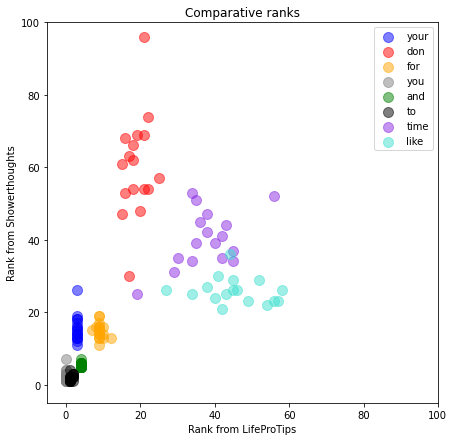

In [35]:
colors = ['blue','red','orange','gray','green','black','blueviolet','turquoise']

plt.figure(figsize=(7,7))
for i in range(len(word_rank_L)):
    plt.scatter(word_rank_L[i], word_rank_S[i], color=colors[i], alpha=0.5, s=100)
# plt.scatter(word_rank_L[1], word_rank_S[1], color='red', alpha=0.5, s=100)
# plt.scatter(word_rank_L[2], word_rank_S[2], color='orange', alpha=0.7, s=100)
# plt.scatter(word_rank_L[3], word_rank_S[3], color='gray', alpha=0.5, s=100)
# plt.scatter(word_rank_L[4], word_rank_S[4], color='pink')
plt.legend(words)
plt.xlabel('Rank from LifeProTips')
plt.ylabel('Rank from Showerthoughts')
plt.title('Comparative ranks')
plt.xlim([-5, 100])
plt.ylim([-5, 100])
plt.show()

* the scale of the axes tells us that these words rank higher on the 'LifeProTips' list than on 'Showerthoughts'
* 'to' appears at the top of the rankings for both but is not weight in the top 10 by the LogReg model
* 'your' is the most important word according to LogReg and does appear high on both lists (higher on LifeProTips)
* 'don' is ranked ~20 on LifeProTips but only ~60 on Showerthoughts
* 'time' is equally ranked on both
* 'like' is ranked higher on Showerthoughts

## 5. Examine Misclassified Posts

In [19]:
misclass = df7[df7['subreddit'] != df7['preds1']].copy() # May '20
misclass.drop(columns='selftext', inplace=True)
misclass.reset_index(inplace=True)
misclass.head(10) # posts from LifeProTips misclassified by LogReg

,level_0,index,subreddit,title,preds1,preds2
0,5,5,1,Woven Calendar,0,1
1,14,14,1,Don’t like soggy cereal? Just eat cereal with milk on the side!,0,0
2,19,19,1,Someone who can never sacrifice anything can never change anything,0,1
3,45,45,1,Got a dog? Pick it's fucking shit off the ground you fucking dickhead,0,0
4,56,56,1,LPT: Be conscious of the difference between addictive and fun. A good indicator is how you feel about something afterwards.,0,0
5,60,60,1,"LPT I’m gonna finish my bachelors in 6 years, and I’m disappointed in myself",0,0
6,61,61,1,I’m gonna finish my bachelors in 6 years and I regret it,0,0
7,73,73,1,Red Pill,0,0
8,75,75,1,"Sometimes, if Im camping or exercising a bunch, I’ll get some serious butt chafe/rash. Neosporin/triple antibacterial ointment is the absolute cure! Reduces friction, and heals the rash within 8 hrs. Instant relief! Nobody ever told me...",0,0
9,78,78,1,"LPT: Men's suits actually have pockets instead of flaps, they are sewn shut and can be opened using a tool.",0,0


In [20]:
misclass.tail(10) # posts from Showerthoughts misclassified by LogReg

,level_0,index,subreddit,title,preds1,preds2
358,1938,962,0,"If you have a Headache and you believe that the Placebo effect will heal your headache, would it heal it?",1,1
359,1939,963,0,".Com, .Net, and .Web you read it aloud. .Edu, you read the letters",1,1
360,1940,964,0,Downvote on a Reddit post is same as YouTube comment's dislike button-they don't work,1,1
361,1944,968,0,"Nice guys/girls share the same vibe as entitled parents on ""I'm a good person and your are a piece of shit for not doing what I want""",1,1
362,1945,969,0,What you do will always matter more than how you feel.,1,1
363,1951,975,0,You can show six numbers with one hand if you use roman numerals. Seven with some skill.,1,1
364,1954,978,0,You're white? You're Ben Affleck.,1,0
365,1960,984,0,"If you're not the firstborn in your family, it's pretty likely your name wasn't your parents' first choice.",1,1
366,1963,987,0,"When you deposit money, you’re just handing your money to stranger to manage it",1,1
367,1975,999,0,"When you say ""back"" your lips do the same.",1,1


Nothing special to pick out from the misclassified posts.

## 6. Are there differences in the sentiment of the misclassified posts compared to correctly classified posts?

In [21]:
# correctly classified posts
rightclass = df7[df7['subreddit'] == df7['preds1']].copy() # May '20
rightclass.drop(columns='selftext', inplace=True)
rightclass.reset_index(inplace=True)

In [22]:
sia = SentimentIntensityAnalyzer()

sent_wr = [sia.polarity_scores(misclass.loc[i,'title'])['compound'] for i in range(misclass.shape[0])]
misclass['sia'] = sent_wr

sent_ri = [sia.polarity_scores(rightclass.loc[i,'title'])['compound'] for i in range(rightclass.shape[0])]
rightclass['sia'] = sent_ri

In [23]:
misclass.head()

,level_0,index,subreddit,title,preds1,preds2,sia
0,5,5,1,Woven Calendar,0,1,0.0000
1,14,14,1,Don’t like soggy cereal? Just eat cereal with milk on the side!,0,0,0.4199
2,19,19,1,Someone who can never sacrifice anything can never change anything,0,1,0.0000
3,45,45,1,Got a dog? Pick it's fucking shit off the ground you fucking dickhead,0,0,-0.8514
4,56,56,1,LPT: Be conscious of the difference between addictive and fun. A good indicator is how you feel about something afterwards.,0,0,0.7351


In [24]:
rightclass.head()

,level_0,index,subreddit,title,preds1,preds2,sia
0,0,0,1,"LPT: if you are like me and you are interested in recovery from your addiction, but you don't like AA meetings because of the religious undertones, checkout SMART recovery. It's similar to AA meetings but it keeps the agency to the person and it focuses on the now and the motivation for the future.",1,1,0.9274
1,1,1,1,LPT: If you are seriously concerned about 0.01% of the population owning 99% of the worlds resources you can start making a difference now by NOT buying goods from companies like Amazon and buying goods from local stores or even national chains.,1,1,0.3612
2,2,2,1,"LPT If you feel like another online shopping spree, leave the items sit in your shopping cart for at least day!",1,1,0.3802
3,3,3,1,"LPT: If you project some activities to enjoy ""together with someone once you're in a relationship"", make it your bucket list to enjoy with friends, family or with your own company. Don't depend on an imaginary person's presence for your fulfilment. Don't put your full enjoyment on hold for anyone.",1,1,0.9201
4,4,4,1,"LPT: When loaning money to friends, only loan as much as you are willing to give as a gift. This prevents money from ruining your friendship.",1,1,0.8020


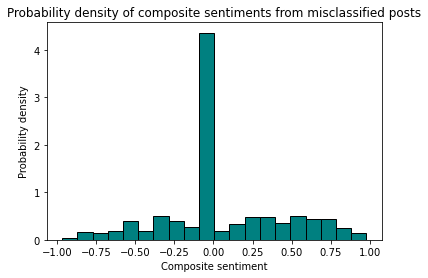

In [25]:
plt.hist(misclass.sia, bins=20, density=True, color='teal', edgecolor='black')
plt.title('Probability density of composite sentiments from misclassified posts')
plt.xlabel('Composite sentiment')
plt.ylabel('Probability density')
plt.show()

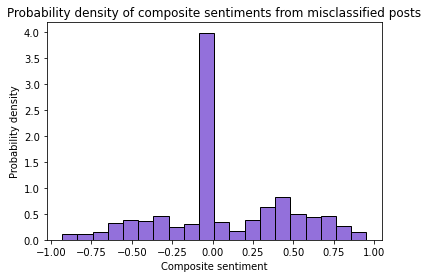

In [26]:
plt.hist(rightclass.sia, bins=20, density=True, color='mediumpurple', edgecolor='black')
plt.title('Probability density of composite sentiments from misclassified posts')
plt.xlabel('Composite sentiment')
plt.ylabel('Probability density')
plt.show()

Most posts are basically neutral according to sentiment analysis. A slightly higher fraction of the correctly classified posts have positive sentiments.

In [27]:
# Manual test
pipe2.predict(['Make sure your pan is hot before adding fat, else your fried egg will stick to the pan'])

array([1])

In [28]:
pipe2.predict(['Shampoo is good'])

array([0])

## 7. How different is different?

Are these models just able to correctly classify 'LifeProTips' vs 'Showerthoughts' posts? Or can they also differentiate or select for posts that are not 'LifeProTips' or 'Showerthoughts'?

In [29]:
# compare performance of these pairs of posts
# original, different S, different L, similar S, similar L, totallydiff, totallydiff

pairs = {
    1: ['LifeProTips', 'LifeProTips', 'space', 'LifeProTips', 'todayilearned','stocks','space'],
    0: ['Showerthoughts', 'space', 'Showerthoughts', 'todayilearned', 'Showerthoughts', 'todayilearned','todayilearned']
        }

In [30]:
# Use LogReg
accuracy1 = []

for num in range(len(pairs[1])):
    
    filename1 = 'df_' + pairs[1][num] + '.csv'
    filename2 = 'df_' + pairs[0][num] + '.csv'

    df1 = pd.read_csv(f'../data/extra/{filename1}')
    df2 = pd.read_csv(f'../data/extra/{filename2}')

    df = pd.concat([df1, df2])
    df.drop_duplicates(inplace=True)
    df.reset_index(inplace=True)
    
    df['subreddit'] = df['subreddit'].map({pairs[1][num]:1, pairs[0][num]:0})
    df.drop(columns='index', inplace=True)

    X = df['title']
    y = df['subreddit']

    # accuracy
    accuracy1.append(pipe1.score(X, y))

In [31]:
# Use SVC
accuracy2 = []

for num in range(len(pairs[1])):
    
    filename1 = 'df_' + pairs[1][num] + '.csv'
    filename2 = 'df_' + pairs[0][num] + '.csv'

    df1 = pd.read_csv(f'../data/extra/{filename1}')
    df2 = pd.read_csv(f'../data/extra/{filename2}')

    df = pd.concat([df1, df2])
    df.drop_duplicates(inplace=True)
    df.reset_index(inplace=True)
    
    df['subreddit'] = df['subreddit'].map({pairs[1][num]:1, pairs[0][num]:0})
    df.drop(columns='index', inplace=True)

    X = df['title']
    y = df['subreddit']

    # accuracy
    accuracy2.append(pipe2.score(X, y))

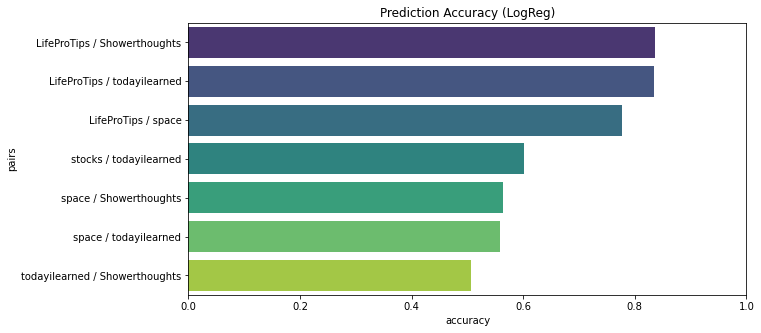

In [32]:
# LogReg
subr_pairs = ["LifeProTips / Showerthoughts", 'LifeProTips / space', 'space / Showerthoughts',
         'LifeProTips / todayilearned', 'todayilearned / Showerthoughts', 'stocks / todayilearned', 'space / todayilearned']

dict = {
    'accuracy':accuracy1,
    'pairs':subr_pairs
}

plt.figure(figsize=(10,5))
pd_dict = pd.DataFrame(dict)
pd_dict = pd_dict.sort_values(by='accuracy', ascending=False)
sns.barplot(x='accuracy', y='pairs', data=pd_dict, palette='viridis')
plt.title('Prediction Accuracy (LogReg)')
plt.xlim([0,1])
plt.show()

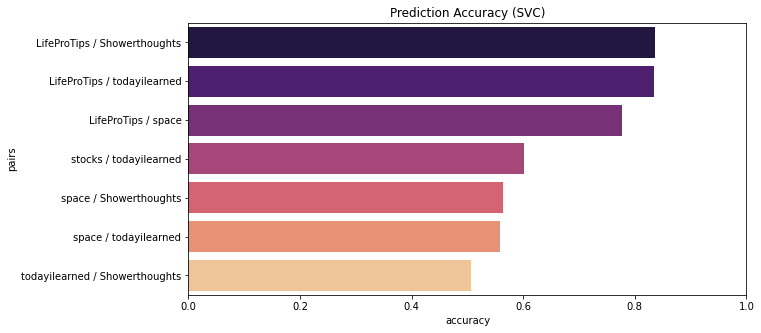

In [33]:
# SVC

plt.figure(figsize=(10,5))
pd_dict = pd.DataFrame(dict)
pd_dict = pd_dict.sort_values(by='accuracy', ascending=False)
sns.barplot(x='accuracy', y='pairs', data=pd_dict, palette='magma')
plt.title('Prediction Accuracy (SVC)')
plt.xlim([0,1])
plt.show()

* LogReg and SVC perform similarly (in accuracy trend) when trying to differentiate between subreddits. This is expected, from their linear relationship shown earlier. Observations from these plots:
    * The model works best (just marginally) when classifying posts from the original 2 subreddits
    * The model sees posts from 'Showerthoughts' to be similar to posts from 'todayilearned', and the accuracy rate when classifying these posts is barely 50%, which is just barely better than a coin toss, and barely above the baseline accuracy. 
    * Another way we see this similarity is because the accuracy when 'LifeProTips' is paired with 'todayilearned' is similar to when 'LifeProTips' is paired with its original partner, 'Showerthoughts'
    * Any time 'LifeProTips' is one of the subreddits, the model is well-able to classify the posts
    * The pair of posts with the worst accuracy even has 'Showerthoughts' in it! (one of the 2 original subreddits)
    * Accuracy of classification is even higher when neither of the subreddits is from the original pair, compared to when 'Showerthoughts' is one of the pair

The model is really learning "what is LifeProTips and what is NOT LifeProTips", instead of "what is LifeProTips and what is Showerthoughts"

## 8. Summary

* Ultimately, both these models are overfit. The training accuracy was 93% for LogReg and 99% for SVC, while these test accuracies are around 83%. The degree of overfitting looks the same (same amount of difference between training score and average testing score). 
* It looks like the prediction accuracy might have some cylical pattern to it, going from high to low every few months. Accuracy is commonly highest overall in Feb 2021 and lowest in May 2020. Even though the accuracy distribution is not exactly the same, from both models, the trends are very very similar as shown by the LogisticRegression
* LogReg and SVC have the same performance for these datasets. This similarity between LogReg and SVC accuracies is amazing and can be fit with a linear relationship
* There is not an obvious relationship between model accuracy and common word count
* By looking at the top 15 words over time, we see that:
    * covid/coronavirus appears in March '20 (amazing and expected)
    * mars appears in Feb '21 (Perseverance rover lands on Mars)
    * there is nothing special about May '20 words (the month with the lowest accuracy score)
    * there is nothing special about Feb '21 words (the month with the highest accuracy score)
* the scale of the axes tells us that these words rank higher on the 'LifeProTips' list than on 'Showerthoughts'
* 'to' appears at the top of the rankings for both but is not weight in the top 10 by the LogReg model
* 'your' is the most important word according to LogReg and does appear high on both lists (higher on LifeProTips)
* 'don' is ranked ~20 on LifeProTips but only ~60 on Showerthoughts
* 'time' is equally ranked on both
* 'like' is ranked higher on Showerthoughts
* Most posts are basically neutral according to sentiment analysis. A slightly higher fraction of the correctly classified posts have positive sentiments.
* LogReg and SVC perform similarly (in accuracy trend) when trying to differentiate between subreddits. This is expected, from their linear relationship shown earlier. Other observations from comparing accuracies when subreddit pairs don't contain the original pair:
    * The model works best (just marginally) when classifying posts from the original 2 subreddits
    * The model sees posts from 'Showerthoughts' to be similar to posts from 'todayilearned', and the accuracy rate when classifying these posts is barely 50%, which is just barely better than a coin toss, and barely above the baseline accuracy. 
    * Another way we see this similarity is because the accuracy when 'LifeProTips' is paired with 'todayilearned' is similar to when 'LifeProTips' is paired with its original partner, 'Showerthoughts'
    * Any time 'LifeProTips' is one of the subreddits, the model is well-able to classify the posts
    * The pair of posts with the worst accuracy even has 'Showerthoughts' in it! (one of the 2 original subreddits)
    * Accuracy of classification is even higher when neither of the subreddits is from the original pair, compared to when 'Showerthoughts' is one of the pair

The model is really learning "what is LifeProTips and what is NOT LifeProTips", instead of "what is LifeProTips and what is Showerthoughts"

## 9. Conclusions and Future work

To better understand what's happening here, we could:
* switch the classification labels such that 'Showerthoughts' is 1 and 'LifeProTips' is 0, when building the model, to see whether the results are similar
* train the model on 'LifeProTips', 'Showerthoughts', and 'todayilearned' all together to see if it is possible to differentiate between these 3 subreddits
* carry out deeper analysis of correctly-classified and misclassified posts on a month-by-month basis